<a href="https://colab.research.google.com/github/IALeMans/Meetup_Image_Classification_Detection_2019/blob/master/20191024_2_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Detection Tutorial**

Inspired by this excellent blog post : https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

In [2]:
!pip install wget
import wget

In [0]:
# import the necessary packages
import PIL
from PIL import Image

import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

In [0]:
def resize_img(filename,basewidth=600):
  img = Image.open(filename)
  
  if img.size[0] > basewidth:
      wpercent = (basewidth / float(img.size[0]))
      hsize = int((float(img.size[1]) * float(wpercent)))
      img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
      img.save(filename)
   
  print(f'resized shape: {img.size}')

In [5]:
#import and resize images
url_list = ['https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/bike.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/bike2.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/bike3.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/cat.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/cat2.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/forkrun.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/manif-velo.jpg'
           ]

for url in url_list:
  filename = wget.download(url)
  resize_img(filename,basewidth=600)

resized shape: (600, 800)
resized shape: (600, 482)
resized shape: (600, 516)
resized shape: (474, 474)
resized shape: (600, 450)
resized shape: (600, 450)
resized shape: (400, 268)


In [0]:
#import model files
url_list = ['https://raw.githubusercontent.com/Sid2697/Object-Detection-MobileNet/master/MobileNetSSD_deploy.prototxt.txt',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/MobileNetSSD_deploy.caffemodel'
           ]
for url in url_list:
  filename = wget.download(url)

Then, we parse our command line arguments (Lines 7-16):

    --image : The path to the input image.
    --prototxt : The path to the Caffe prototxt file.
    --model : The path to the pre-trained model.
    --confidence : The minimum probability threshold to filter weak detections. The default is 20%.


In [0]:
image_filename = 'cat.jpg'
prototxt='MobileNetSSD_deploy.prototxt.txt'
model='MobileNetSSD_deploy.caffemodel'
confidence_threshold=0.2

In [0]:
# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [9]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [0]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
image = cv2.imread(image_filename)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,
	(300, 300), 127.5)

In [11]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [12]:
# loop over the detections
for i in np.arange(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
 
	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > confidence_threshold:
		# extract the index of the class label from the `detections`,
		# then compute the (x, y)-coordinates of the bounding box for
		# the object
		idx = int(detections[0, 0, i, 1])
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# display the prediction
		label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		print("[INFO] {}".format(label))
		cv2.rectangle(image, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(image, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

[INFO] cat: 98.67%


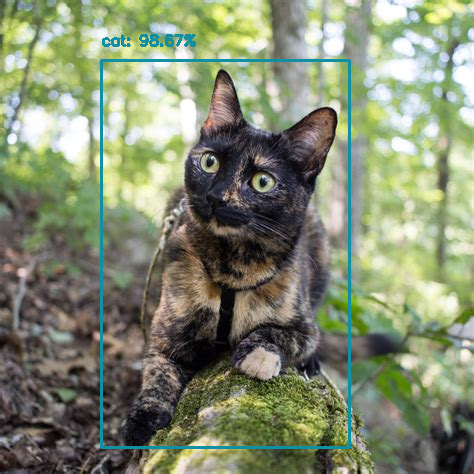

-1

In [13]:
# show the output image
cv2_imshow(image)
cv2.waitKey(0)

**one more**

In [0]:
def img_detect(filename):
  image = cv2.imread(filename)
  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,(300, 300), 127.5)
  print("[INFO] computing object detections...")
  net.setInput(blob)
  detections = net.forward()

  # loop over the detections
  for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
 
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_threshold:
      # extract the index of the class label from the `detections`,
      # then compute the (x, y)-coordinates of the bounding box for
      # the object
      idx = int(detections[0, 0, i, 1])
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      # display the prediction
      label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
      print("[INFO] {}".format(label))
      cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[idx], 2)
      y = startY - 15 if startY - 15 > 15 else startY + 15
      cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

  # show the output image
  cv2_imshow(image)
  cv2.waitKey(0)

[INFO] computing object detections...
[INFO] cat: 99.96%


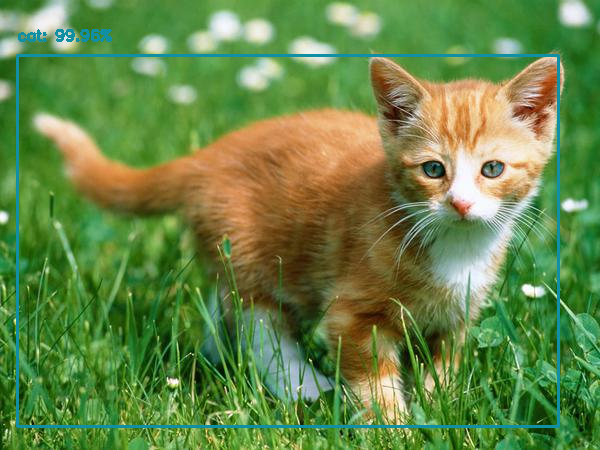

In [15]:
filename='cat2.jpg'
img_detect(filename)

[INFO] computing object detections...
[INFO] bicycle: 37.90%
[INFO] car: 63.63%
[INFO] car: 45.83%


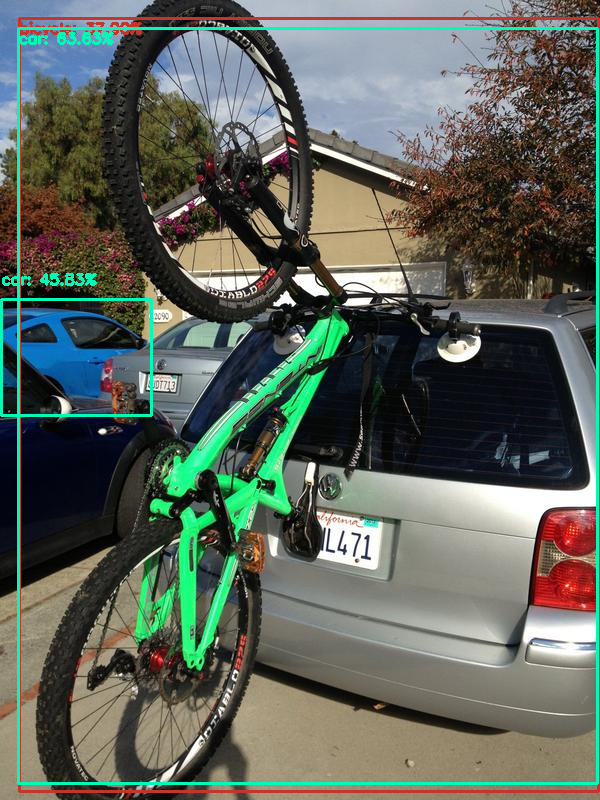

In [16]:
filename='bike.jpg'
img_detect(filename)

[INFO] computing object detections...
[INFO] bicycle: 81.80%
[INFO] person: 80.41%


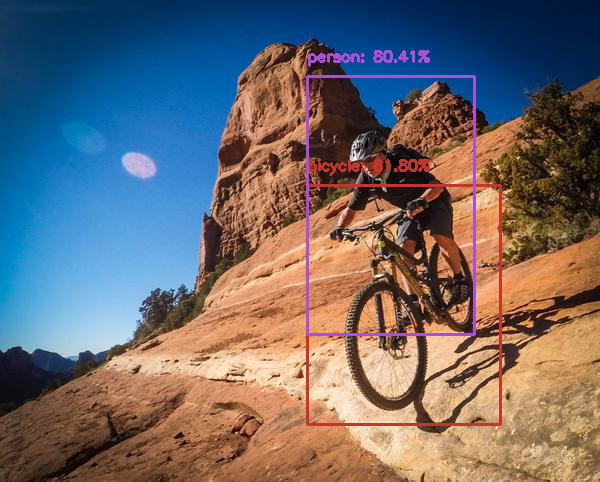

In [17]:
filename='bike2.jpg'
img_detect(filename)

[INFO] computing object detections...
[INFO] bicycle: 100.00%


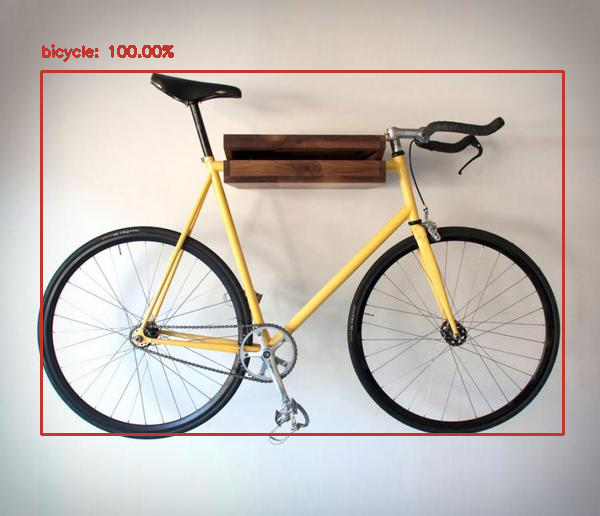

In [18]:
filename='bike3.jpg'
img_detect(filename)

[INFO] computing object detections...
[INFO] bicycle: 99.45%
[INFO] bicycle: 46.47%
[INFO] bicycle: 27.45%
[INFO] car: 68.02%
[INFO] motorbike: 74.67%
[INFO] person: 99.90%
[INFO] person: 99.81%
[INFO] person: 68.35%
[INFO] person: 58.11%
[INFO] person: 35.03%


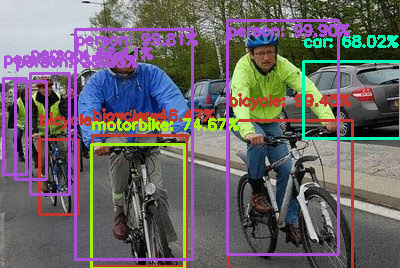

In [21]:
filename='manif-velo.jpg'
img_detect(filename)

**images downloaded during the meetup**

resized shape: (275, 183)
[INFO] computing object detections...
[INFO] bicycle: 98.86%


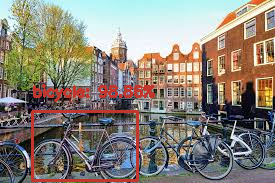

resized shape: (76, 76)
[INFO] computing object detections...
[INFO] bottle: 41.16%
[INFO] bottle: 30.30%


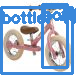

resized shape: (425, 221)
[INFO] computing object detections...
[INFO] motorbike: 99.71%


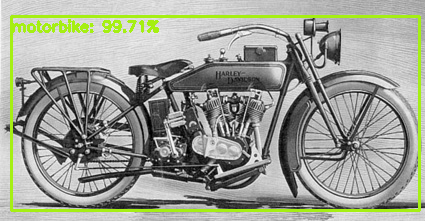

resized shape: (310, 163)
[INFO] computing object detections...
[INFO] motorbike: 31.38%


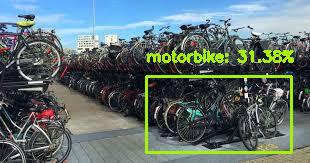

resized shape: (350, 350)
[INFO] computing object detections...
[INFO] bicycle: 92.88%


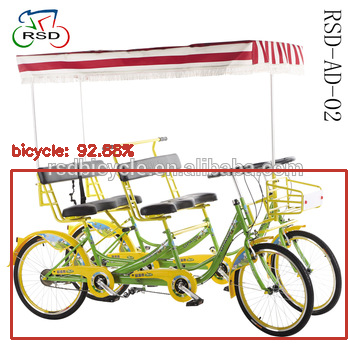

resized shape: (600, 337)
[INFO] computing object detections...
[INFO] bicycle: 99.77%
[INFO] bicycle: 47.24%


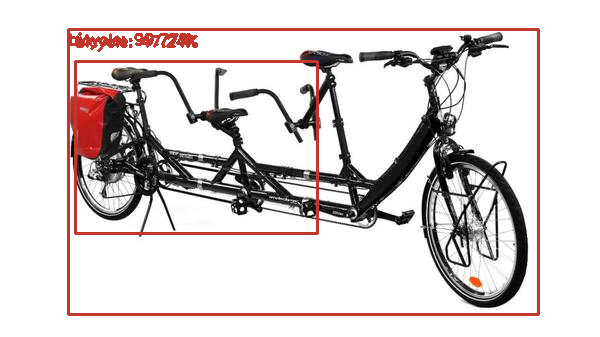

resized shape: (327, 154)
[INFO] computing object detections...
[INFO] bicycle: 99.71%
[INFO] bicycle: 98.20%
[INFO] person: 33.58%
[INFO] pottedplant: 54.78%


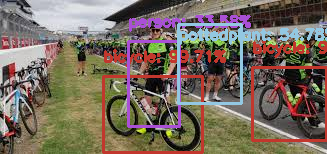

resized shape: (275, 183)
[INFO] computing object detections...
[INFO] bicycle: 56.54%
[INFO] bicycle: 25.64%
[INFO] motorbike: 28.72%
[INFO] person: 93.90%
[INFO] person: 92.82%
[INFO] person: 83.60%
[INFO] person: 77.25%
[INFO] person: 69.75%
[INFO] person: 52.10%
[INFO] person: 29.88%


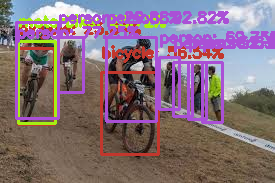

resized shape: (600, 337)
[INFO] computing object detections...
[INFO] aeroplane: 59.67%


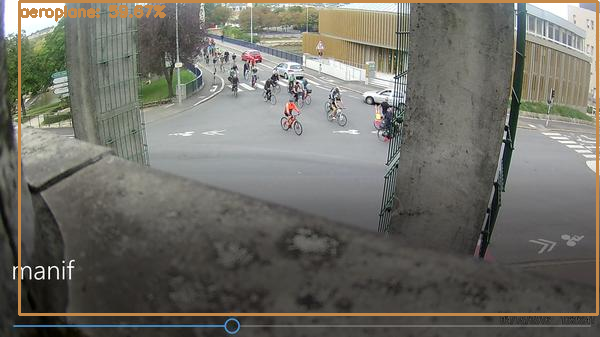

In [22]:
url_list = ['https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/amsterdam.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/draisienne.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/harley.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/hollande.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/seat.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/tandem-triplette.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/velo1.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/velo2.jpg',
            'https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/capture.JPG'
           ]

for url in url_list:
  filename = wget.download(url)
  resize_img(filename,basewidth=600)
  img_detect(filename)

resized shape: (600, 600)
[INFO] computing object detections...
[INFO] bicycle: 98.86%
[INFO] bicycle: 74.37%
[INFO] bicycle: 47.88%
[INFO] car: 46.12%
[INFO] motorbike: 54.31%
[INFO] person: 65.42%
[INFO] person: 65.36%
[INFO] person: 59.57%


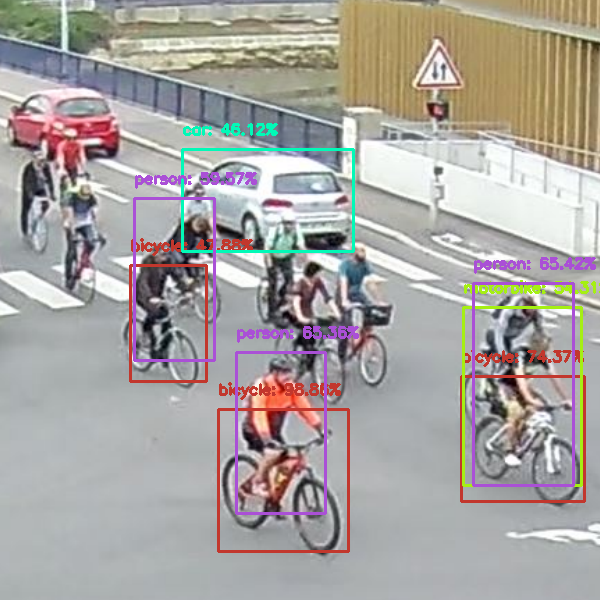

In [24]:
url='https://github.com/IALeMans/Meetup_Image_Classification_Detection_2019/raw/master/capture_zoomin.png'
filename = wget.download(url)
resize_img(filename,basewidth=600)
img_detect(filename)